<a href="https://colab.research.google.com/github/pkp2207/Facial-Recognition-using-Facenet/blob/master/facenet_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install facenet-pytorch


In [22]:
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image,ImageFile
import matplotlib.pyplot as plt
import numpy as np
import os
# Allow loading of truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [23]:
# If GPU is available, use it. Otherwise, use CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load MTCNN for face detection
mtcnn = MTCNN(keep_all=True, device=device)


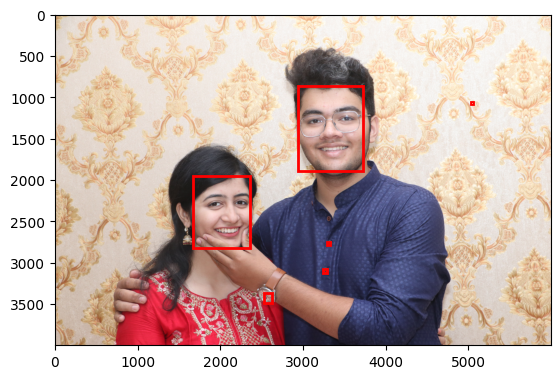

In [24]:
# Load an example image
img_path = '/content/IMG_6816.JPG'  # Replace with the path to your image
img = Image.open(img_path)

# Detect faces in the image
boxes, _ = mtcnn.detect(img)

# Display the image with detected faces
img_np = np.array(img)
plt.imshow(img_np)
if boxes is not None:
    for box in boxes:
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, color='red', linewidth=2))
plt.show()


In [25]:
# Create a directory to save the extracted face images
output_dir = '/content/extracted_faces'
os.makedirs(output_dir, exist_ok=True)

# Crop and save face regions as images
if boxes is not None:
    for i, (x, y, w, h) in enumerate(boxes):
        face_img = img.crop((int(x), int(y), int(w), int(h)))
        face_img.save(f"{output_dir}/face_{i+1}.jpg")
    print(f"Extracted faces are saved in: {output_dir}")
else:
    print("No faces detected.")


Extracted faces are saved in: /content/extracted_faces
